In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.1529, -0.9587]) 
label: tensor([7.7726])


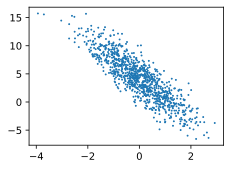

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1310, -1.9044],
        [-0.0820,  1.0859],
        [ 0.8168, -0.2207],
        [-0.9390, -0.3334],
        [ 0.0415, -0.0533],
        [ 0.0552,  0.3987],
        [-0.9608,  0.2285],
        [ 0.5196,  0.6426],
        [-0.9280,  0.3912],
        [-0.0775,  1.2279]]) 
 tensor([[10.9382],
        [ 0.3422],
        [ 6.5707],
        [ 3.4735],
        [ 4.4589],
        [ 2.9353],
        [ 1.4963],
        [ 3.0709],
        [ 1.0079],
        [-0.1271]])


## 3.2.3初始化模型参数

In [26]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## 3.2.4定义模型

In [20]:
def linreg(X, w, b):
    ''' 线性回归模型'''
    return torch.matmul(X, w) + b

## 3.2.5 定义损失函数

In [22]:
#定义损失函数
def squared_loss(y_hat, y):
    #均方损失
    return (y_hat - y.reshape(y_hat.shape))**2/2

## 3.2.6定义优化算法

In [55]:
def sgd(params, lr, batch_size):
    #小批量梯度下降
    with torch.no_grad():  #这里with用来自动管理作用域，确保代码块执行完后恢复默认状态
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [63]:
lr = 0.01
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) #使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        #print(train_l)
        print(f'epoch:{epoch+1}, loss:{float(train_l.mean()):f}')

epoch:1, loss:0.000047
epoch:2, loss:0.000047
epoch:3, loss:0.000047
epoch:4, loss:0.000047
epoch:5, loss:0.000047
epoch:6, loss:0.000047
epoch:7, loss:0.000047
epoch:8, loss:0.000047
epoch:9, loss:0.000047
epoch:10, loss:0.000047


In [61]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([-0.0003,  0.0002], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0003], grad_fn=<RsubBackward1>)
